In [1]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [2]:
def calc_total_usd(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def calc_total_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [3]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_usd_node", calc_total_usd)
builder.add_node("calc_total_inr_node", calc_total_inr)

builder.add_edge(START, "calc_total_usd_node")
builder.add_edge("calc_total_usd_node", "calc_total_inr_node")
builder.add_edge("calc_total_inr_node", END)

graph = builder.compile()

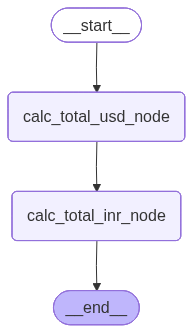

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({'amount_usd': 100})

{'amount_usd': 100, 'total_usd': 108.0, 'total_inr': 9180.0}